### Practical 6
### Ньяти Каелиле БВТ2201

### Exercise 1

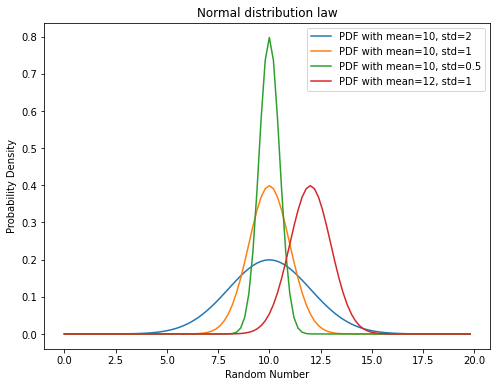

In [63]:
import math
import matplotlib.pyplot as plt

# Define standard deviations and expectations
exp_values = [10, 10, 10, 12]
std_values = [2, 1, 0.5, 1]


def normal_dis_function(std, expectation, x):
    part_1 = 1 / (std * (math.sqrt(2 * math.pi)))  # standard deviation
    part_2 = math.exp((-1 / 2) * (((x - expectation) / std) ** 2))  # expectation
    result = part_1 * part_2
    return result


def cdf_function(x, std=2, expectation=10):
    # Extend the x range to better capture the full area
    left_boundary = 0
    right_boundary = 20
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]  # List of x values

    # Calculate PDF values for the x_values range
    pdf_values = [normal_dis_function(std, expectation, x_val) for x_val in x_values]

    # Calculate CDF value for the input 'x'
    cumulative_sum = 0
    dx = x_values[1] - x_values[0]  # Step size

    if x <= left_boundary:
        return 0.0  # CDF is 0 below the range
    if x >= right_boundary:
        return 1.0  # CDF is 1 above the range
    
    # Loop through the PDF values and compute the cumulative sum until we reach the desired 'x'
    for i, pdf in enumerate(pdf_values):
        cumulative_sum += pdf * dx
        if x_values[i] >= x:
            break

    # Normalize the CDF to go from 0 to 1
    total_area = sum(pdf_values) * dx  # Total area under the curve (approximation)
    normalized_cdf = cumulative_sum / total_area  # Normalize to the total area under the curve

    return normalized_cdf



def draw_pdf(left_boundary, right_boundary):
    # Create the histogram plot
    plt.figure(figsize=(8, 6))

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]

    # Loop over each pair of std and expectation values
    for std, expectation in zip(std_values, exp_values):
        y_values = [normal_dis_function(std, expectation, x) for x in x_values]
        plt.plot(x_values, y_values, label=f"PDF with mean={expectation}, std={std}")

    # Labeling the axes
    plt.title("Normal distribution law")
    plt.xlabel("Random Number")
    plt.ylabel("Probability Density")
    plt.legend()

    # Show the plot
    plt.show()

# Define boundaries and number of plots
left_boundary = 0  # Minimum boundary of the range
right_boundary = 20  # Maximum boundary of the range

draw_pdf(left_boundary, right_boundary)



### Exercise 2

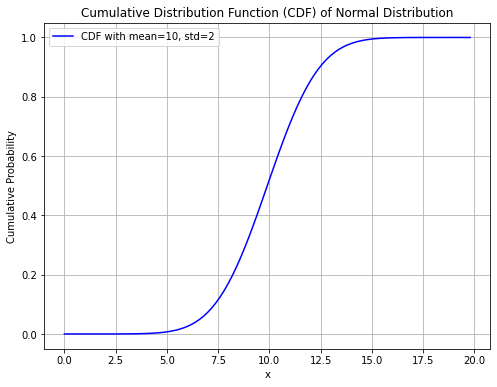

In [64]:
def draw_cdf(left_boundary, right_boundary):

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]

    cdf_values = [cdf_function(x) for x in x_values]  # Use cdf_function to get a single CDF value for each x

    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, cdf_values, color='blue', label=f"CDF with mean={exp_values[0]}, std={std_values[0]}")
    plt.title("Cumulative Distribution Function (CDF) of Normal Distribution")
    plt.xlabel("x")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True)
    plt.show()



draw_cdf(left_boundary, right_boundary)
#cdf_function(10) #for testing if cdf function is giving expected results


### Exercise 3

#### части 1 и 2

In [65]:
def GetArg(F, minArg, maxArg, Value, eps):
    minVal= F(minArg)
    maxVal= F(maxArg)

    while abs((maxArg - minArg)/maxArg) > eps:
        midArg = (minArg + maxArg)/2
        midVal = F(midArg)

        if midVal > Value:
            maxArg = midArg
            maxVal = midVal
        else:
            minArg = midArg
            minVal = midVal
            
    return (minArg + maxArg)/2



def GetTabF(F, minArg, maxArg, PointsCount):
    # Calculate the range of the function
    minVal = F(minArg)
    maxVal = F(maxArg)

    # Calculate the step size for dividing the CDF range
    dVal = (maxVal - minVal) / (PointsCount - 1)

    # Initialize lists to store XTab and YTab
    YTab = [minVal]
    XTab = [minArg]
    
    # Loop to populate intermediate points
    for i in range(1, PointsCount - 2):
        YTab_i = minVal + dVal * i  # Calculate the YTab value
        XTab_i = GetArg(F, minArg, maxArg, YTab_i, 10**-15)  # Find the corresponding XTab value

        YTab.append(YTab_i)
        XTab.append(XTab_i)
    
    YTab.append(maxVal) # YTab[PointsCount-1]= maxVal
    XTab.append(maxArg) # XTab[PointsCount-1]= maxArg

    print(f"YTab={YTab}")
    print(f"XTab={XTab}")

    
    return XTab, YTab


#### часть 3

YTab=[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 1.0]
XTab=[0, 5.200000000000003, 5.599999999999998, 5.999999999999998, 6.399999999999999, 6.6, 6.6, 6.799999999999999, 7.0, 7.199999999999999, 7.199999999999999, 7.4, 7.4, 7.6, 7.6, 7.800000000000001, 7.800000000000001, 7.800000000000001, 8.0, 8.0, 8.200000000000001

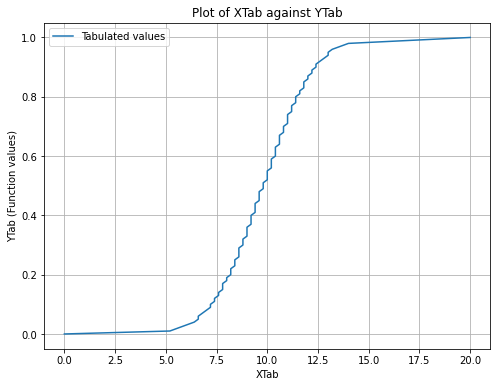

In [114]:
expectation= 10
std=2


# Get the tabulated data
minArg = expectation - 10
maxArg = expectation + 10
TabSize = 101

 # Get the XTab and YTab values
XTab, YTab = GetTabF(cdf_function, minArg, maxArg, TabSize)

def plot_xtab_ytab(XTab, YTab):
   
    plt.figure(figsize=(8, 6))
    plt.plot(XTab, YTab, label="Tabulated values")
    
    plt.title("Plot of XTab against YTab")
    plt.xlabel("XTab")
    plt.ylabel("YTab (Function values)")
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

plot_xtab_ytab(XTab, YTab)



#### часть 4

In [95]:

def Model_N(XTab, YTab, p):
    for i in range(1, len(XTab)):
        if YTab[i-1] <= p <= YTab[i]:
            # Linear interpolation formula
            y = (
                XTab[i-1] * (p - YTab[i]) / (YTab[i-1] - YTab[i]) +
                XTab[i] * (p - YTab[i-1]) / (YTab[i] - YTab[i-1])
            )
            return y




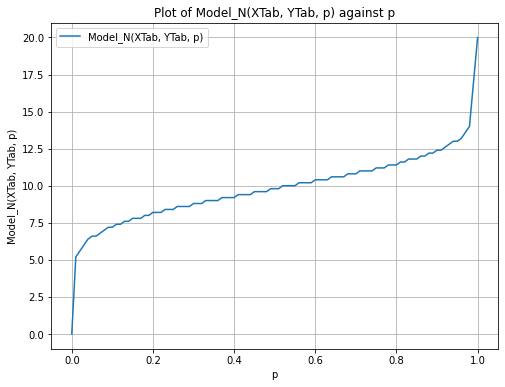

In [68]:
def plot_model_N(XTab, YTab):
    left_boundary = 0
    right_boundary = 1
    p_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(101)]

    # Compute Model_N for each p
    model_N_values = [Model_N(XTab, YTab, p) for p in p_values]

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(p_values, model_N_values, label="Model_N(XTab, YTab, p)")

    plt.title("Plot of Model_N(XTab, YTab, p) against p")
    plt.xlabel("p")
    plt.ylabel("Model_N(XTab, YTab, p)")

     # Adjust the legend location to the right of the plot
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.grid(True)
    plt.show()


plot_model_N(XTab, YTab)

#### часть 5

In [123]:
import random

# Define the different n values
n_values = [10**3, 10**4, 10**5, 10**6]

# Dictionary to store results for each n
ParArr_results = {}

for n in n_values:
    #p_values = [random.uniform(0, 1) for _ in range(n)]  # Generate random p values

    
    def random_close_to_mean(n, mean=10, std_dev=2, samples=12):
        p_values = []
        for _ in range(n):
            # Generate the sum of 'samples' uniform random variables
            uniform_sum = sum(random.uniform(0, 1) for _ in range(samples))
            
            # Rescale to approximate a normal distribution
            # Mean of uniform_sum is samples / 2, variance is samples / 12
            normalized = (uniform_sum - samples / 2) / (samples / 12)**0.5
            
            # Scale and shift to get the desired mean and standard deviation
            value = normalized * std_dev + mean
            p_values.append(value)
        return p_values
    

    p_values = random_close_to_mean(n) 

    # Compute Model_N for each p and store in the dictionary
    #ParArr_results[n] = [Model_N(XTab, YTab, p) for p in p_values]
    ParArr_results[n] = p_values

    # Output statistics
    #print(f"Results for n = {n}:")
    #print(f"Length: {len(ParArr_results[n])}")
    #print(f"Series: {ParArr_results[n]}")
    #print(f"Max: {max(ParArr_results[10**6])}")
    #print(f"Min: {min(ParArr_results[10**6])}")
    #print()
print(f"Results for n = {10**6}:")
print(f"Length: {len(ParArr_results[10**6])}")
#print(f"Series: {ParArr_results[n]}")
print(f"Max: {max(ParArr_results[10**6])}")
print(f"Min: {min(ParArr_results[10**6])}")


Results for n = 1000000:
Length: 1000000
Max: 18.948797853064274
Min: 0.4834782184299158


### Exercise 4

#### часть 1

In [70]:
def GetFreqDistr(RParamsArr, A, B, IntervalsCount):
    dY = (B-A)/IntervalsCount

    Freq = [0] * (IntervalsCount)

    for j in range(len(RParamsArr)-1):
        Yc= RParamsArr[j]

        if Yc < A or Yc > B:
            continue
        
        fN = math.floor(Yc/dY)

        Freq[fN]+=1
        
    #Normalizing the frequency values
    for i in range(IntervalsCount): #normalizing all bins including the last one
        Freq[i] = Freq[i]/(len(RParamsArr)*dY)

    return Freq

#### часть 2

In [116]:
A= 0
B= 20
K= 100

resX_values=[]

for k in range(K):
    resX= ((B-A)/K)*(0.5 + k)
    resX_values.append(resX)

resY_e3= GetFreqDistr(ParArr_results[10**3], A, B, K)
resY_e4= GetFreqDistr(ParArr_results[10**4], A, B, K)
resY_e5= GetFreqDistr(ParArr_results[10**5], A, B, K)
resY_e6= GetFreqDistr(ParArr_results[10**6], A, B, K)

resY_list= [resY_e3, resY_e4, resY_e5, resY_e6]

print(resY_e4)
print(ParArr_results[10**4])
#print(resX_values)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0015, 0.0005, 0.001, 0.001, 0.003, 0.0025, 0.0025, 0.003, 0.0095, 0.0065, 0.011, 0.0165, 0.0215, 0.026, 0.026, 0.0325, 0.043, 0.0595, 0.0785, 0.0715, 0.0865, 0.1015, 0.1035, 0.13, 0.1285, 0.122, 0.139, 0.148, 0.1615, 0.179, 0.185, 0.185, 0.1945, 0.196, 0.202, 0.215, 0.1845, 0.19, 0.179, 0.183, 0.16, 0.146, 0.136, 0.1225, 0.1125, 0.109, 0.1005, 0.0945, 0.0535, 0.06, 0.054, 0.043, 0.0325, 0.031, 0.0285, 0.013, 0.015, 0.0145, 0.014, 0.0075, 0.004, 0.003, 0.0055, 0.0015, 0.0015, 0.002, 0.0015, 0.0015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[9.988398522629451, 10.247335778194868, 8.976846125230924, 12.761594329689737, 10.248182929059672, 9.650400040673683, 9.68703096974201, 7.860646419704985, 8.603494706674779, 8.33178945126415, 8.131465038226294, 10.23013516876347, 8.53366194963582, 9.48032581180085, 7.839994662319198, 13.909011593456611, 12.906583678238668, 6.53787

 Histogram and pdf for resY_e3


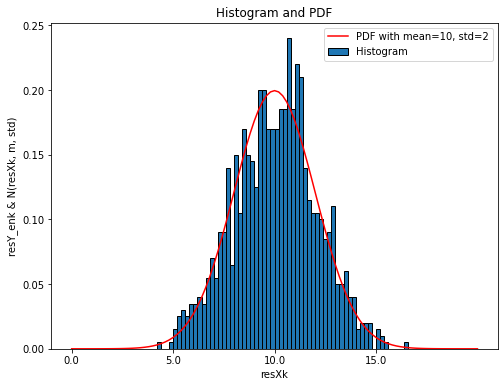

 Histogram and pdf for resY_e4


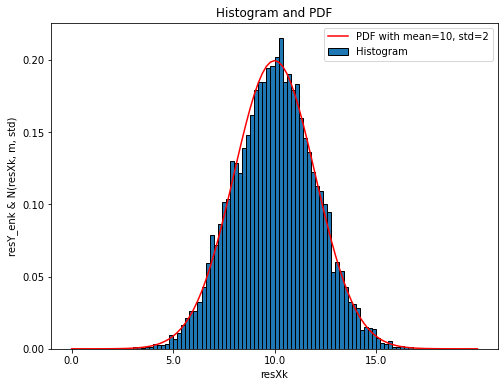

 Histogram and pdf for resY_e5


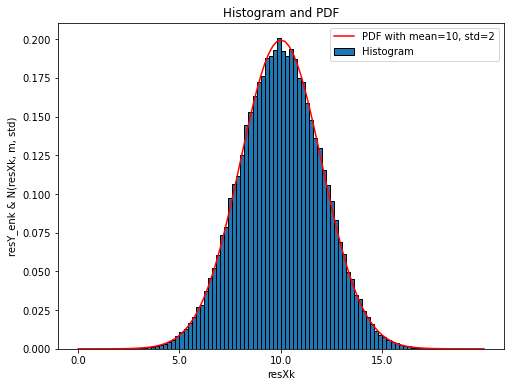

 Histogram and pdf for resY_e6


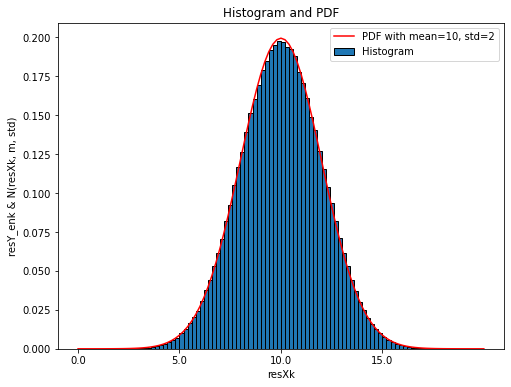

In [117]:
def draw_pdf_and_hist(left_boundary, right_boundary, num_plots, relative_frequencies, std=2, expectation=10):
    # Create the histogram plot
    plt.figure(figsize=(8, 6))

    bar_width = (right_boundary - left_boundary) / num_plots

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(101)] 
    y_values = [normal_dis_function(std, expectation, x) for x in x_values]
    plt.plot(x_values, y_values, label=f"PDF with mean={expectation}, std={std}", color='red')


    
     # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]



    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    
    
     # Set x-ticks every 5 units
    xticks = range(0, right_boundary, 5)  # Labels every 5 units
    plt.xticks(xticks)  # Set the x-ticks
        
    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("resXk")
    plt.ylabel("resY_enk & N(resXk, m, std)")
    plt.legend()

    

    # Show the plot
    plt.show()


left_boundary = 0  
right_boundary = 20  


for n, resY in enumerate(resY_list, start=3):  # Enumerate starting from 3 for proper labeling
    print(f" Histogram and pdf for resY_e{n}")
    
    draw_pdf_and_hist(left_boundary, right_boundary, K, resY)


#### часть 3

In [118]:
def std_hist(std, expectation, resY_no, K):
    std_values = []
    for i in range(K):
        const =  ((normal_dis_function(std, expectation, resX_values[i]) - resY_no[i])**2) / K
        std_values.append(const)
        
    return std_values

print(f"std for resY_e3[i] and N(resXi, m, std): {sum(std_hist(std, expectation, resY_e3,K))}")
print(f"std for resY_e4[i] and N(resXi, m, std): {sum(std_hist(std, expectation, resY_e4,K))}")
print(f"std for resY_e5[i] and N(resXi, m, std): {sum(std_hist(std, expectation, resY_e5,K))}")
print(f"std for resY_e6[i] and N(resXi, m, std): {sum(std_hist(std, expectation, resY_e6,K))}")

std for resY_e3[i] and N(resXi, m, std): 0.0002520551735450721
std for resY_e4[i] and N(resXi, m, std): 2.961688636963696e-05
std for resY_e5[i] and N(resXi, m, std): 4.224228679938786e-06
std for resY_e6[i] and N(resXi, m, std): 1.0516406390860579e-06


#### часть 5

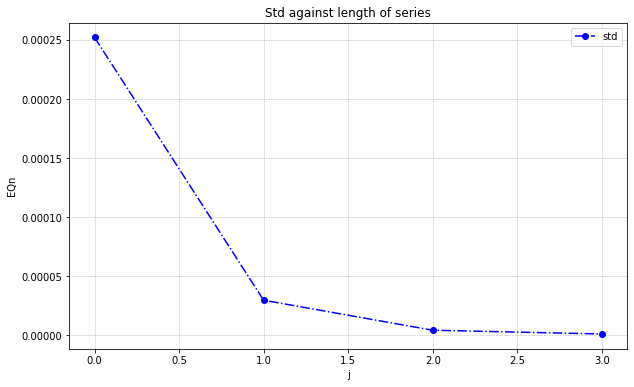

In [120]:
def draw_graph_std(len_series, std_values):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(len_series, std_values, marker='o', linestyle='dashdot', label="std", color="blue")
    #plt.plot(n_values, lower_bounds, marker='o', linestyle='--',  label="M_min_i (Lower Bound)", color="red")
    #plt.plot(n_values, upper_bounds, marker='o', linestyle='--', label="M_max_i (Upper Bound)", color="green")
    #plt.plot(n_values, individual_means, marker='o', label="Mi (Individual Means)", color="purple")

    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel('j')
    plt.ylabel('EQn')
    plt.title('Std against length of series')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

len_Series = [0, 1, 2, 3]
std_values= [sum(std_hist(std, expectation, resY_e3,K)), sum(std_hist(std, expectation, resY_e4,K)), sum(std_hist(std, expectation, resY_e5,K)), sum(std_hist(std, expectation, resY_e6,K))]

draw_graph_std(len_Series, std_values)

In [75]:
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []

n_v = [5, 10, 15, 30, 40, 50]

# Function to generate random numbers close to a given mean using CLT
def random_close_to_mean(n, mean=10, std_dev=4, samples=12):
    numbers = []
    for _ in range(n):
        # Generate the sum of 'samples' uniform random variables
        uniform_sum = sum(random.uniform(0, 1) for _ in range(samples))
        
        # Rescale to approximate a normal distribution
        # Mean of uniform_sum is samples / 2, variance is samples / 12
        normalized = (uniform_sum - samples / 2) / (samples / 12)**0.5
        
        # Scale and shift to get the desired mean and standard deviation
        value = normalized * std_dev + mean
        numbers.append(value)
    return numbers


for idx, count in enumerate(n_v):
    # Generate `count` numbers and directly extend the corresponding list
    numbers = random_close_to_mean(count)
    eval(f'a{idx + 1}').extend(numbers)

"""
for idx, count in enumerate(n_v):
    for _ in range(count):
        num = random.uniform(0, 20)
        eval(f'a{idx + 1}').append(num)
"""

print("a1:", a1)
print("a2:", a2)
print("a3:", a3)
print("a4:", a4)
print("a5:", a5)
print("a6:", a6)


a1: [5.875414156867418, 12.379597557443404, 11.46658141985641, 6.3901040645272005, 11.09230610447981]
a2: [10.494627632944454, 13.497853247007445, 16.179350045443805, 8.933365584134709, 11.419860323445416, 12.272925645728233, 16.73499328957314, 3.49478128778701, 10.399001554119714, 4.179631394801628]
a3: [8.003769187372235, 15.436863004250686, 8.611544247294805, 11.57083286107369, 7.305949975917809, 11.253673002685044, 10.868224055782505, 9.11228017712817, 10.224210325583144, 9.685992215853343, 14.747456510470641, 16.112023482485817, 6.225452999356531, 12.510940178186775, 7.310527853788745]
a4: [11.61280720134257, 14.039022546293918, 15.613434699473377, 4.176492193482321, 8.111234440638537, 5.872367182041415, 8.040469623636596, 14.144710837658149, 7.796704401094267, 11.086861804240627, 4.627783838053041, 11.863139757414007, 11.953172141701025, 8.823272452279419, 7.659393462730403, 9.754622582432518, 6.6119671738577495, 7.770266327937506, 10.663988065385105, 6.339810971672165, 13.640124

In [76]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)

#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

In [77]:
import numpy as np

# Function to calculate mean, variance, and standard deviation
def calculate_statistics(sequence):
    mean = mean_sample(sequence)
    mean_square = mean_of_squares_sample(sequence)
    variance = unbiased_sample_variance(sequence, mean, mean_square) 
    std_dev = standard_deviation(variance)
    return mean, variance, std_dev



In [78]:
import matplotlib.pyplot as plt
def draw_graph_mat_exp(n_values, mat_values, lower_bounds, upper_bounds, individual_means):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, mat_values, marker='o', linestyle='dashdot', label="M_s (Average mathematical exp)", color="blue")
    plt.plot(n_values, lower_bounds, marker='o', linestyle='--',  label="M_min_i (Lower Bound)", color="red")
    plt.plot(n_values, upper_bounds, marker='o', linestyle='--', label="M_max_i (Upper Bound)", color="green")
    plt.plot(n_values, individual_means, marker='o', label="Mi (Individual Means)", color="purple")

    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel('Ni (Sample Size)')
    plt.ylabel('Mean Value')
    plt.title('Confidence Intervals for Mean')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


def draw_graph_std(n_values, individual_std, std_values, std_min_intervals, std_max_intervals ):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, individual_std, marker='o', label='S_i (Calculated Standard Deviation)')
    plt.plot(n_values, std_values, marker='o', linestyle='dashdot', label="Sc (Average std)", color="blue")
    plt.plot(n_values, std_min_intervals, marker='x', linestyle='--', label='S_min_i (Lower Bound)')
    plt.plot(n_values, std_max_intervals, marker='x', linestyle='--', label='S_max_i (Upper Bound)')
    plt.xscale('linear')
    plt.yscale('linear')

    plt.xlabel('Ni (Sample Size)')
    plt.ylabel('Standard Deviation')
    plt.title('Confidence Intervals for Standard Deviation')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


_______WHERE p=0.05_________

Statistics for a1 where n=5:
  Mean = 9.441
  Variance = 9.372
  Standard Deviation = 3.061

Normal Distribution Critical Value for a1 (seq=[5.875414156867418, 12.379597557443404, 11.46658141985641, 6.3901040645272005, 11.09230610447981]) (p=0.05): 1.960 

a_min = 6.757492006946228
a_max = 12.124109314323468 

Student's t-Distribution Critical Value for a1 (seq=[5.875414156867418, 12.379597557443404, 11.46658141985641, 6.3901040645272005, 11.09230610447981]): 2.776

a_min_t = 5.639680213507358
a_max_t = 13.241921107762337

Sequence a1 with n = 5
  Chi-squared upper critical value (1 - p/2): 11.143
  Chi-squared lower critical value (p/2): 0.484

Confidence interval for variance and standard deviation for sequence a1:
 s_min_2: 3.364, s_max_2: 77.385
 s_a_min: 1.834, s_a_max: 8.797

______________________________________________________________________________________________________________________________________________

Statistics for a2 where n=10:
  M

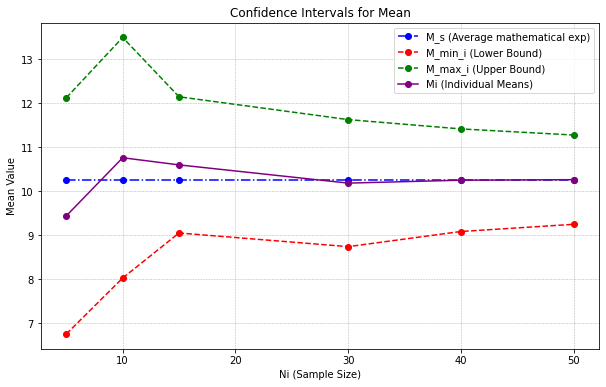

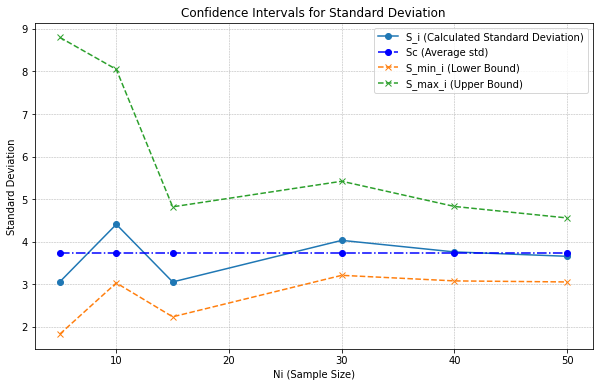

In [81]:
from scipy.stats import norm, t
import scipy.stats as stats

# Define the significance level
#p_values = [0.1, 0.05, 0.02, 0.01]
p_values = [0.05]

for p in p_values:
    print(f"_______WHERE p={p}_________\n")
    
    # Calculate statistics and confidence intervals for each sequence
    lower_bounds = []
    upper_bounds = []

    lower_bounds_t = []
    upper_bounds_t = []

    individual_means = []

    std_min_intervals = []
    std_max_intervals = []

    
    std_min_intervals_t = []
    std_max_intervals_t = []

    individual_std = []

    for i, seq in enumerate([a1, a2, a3, a4, a5, a6], start=1):
        mean, variance, std_dev = calculate_statistics(seq)
        n = len(seq)

        # Store individual means and stds
        individual_means.append(mean)
        individual_std.append(std_dev)

        
        print(f"Statistics for a{i} where n={n}:")
        print(f"  Mean = {mean:.3f}")
        print(f"  Variance = {variance:.3f}")
        print(f"  Standard Deviation = {std_dev:.3f}")
        print()


        # Normal distribution critical value
        normal_quantile = norm.ppf(1 - p / 2)
        a_min = mean - normal_quantile * (std_dev / math.sqrt(n))
        a_max = mean + normal_quantile * (std_dev / math.sqrt(n))
        print(f"Normal Distribution Critical Value for a{i} (seq={seq}) (p={p}): {normal_quantile:.3f} \n")
        print(f"a_min = {a_min}")
        print(f"a_max = {a_max} \n")

        # Store upper and lower quantiles
        lower_bounds.append(a_min)
        upper_bounds.append(a_max)

        # Student's t-distribution critical value
        t_quantile = t.ppf(1 - p / 2, df=n - 1)
        a_min_t = mean - t_quantile * (std_dev / math.sqrt(n))
        a_max_t = mean + t_quantile * (std_dev / math.sqrt(n))
        print(f"Student's t-Distribution Critical Value for a{i} (seq={seq}): {t_quantile:.3f}\n")
        print(f"a_min_t = {a_min_t}")
        print(f"a_max_t = {a_max_t}\n")

        # Store upper and lower quantiles
        lower_bounds_t.append(a_min_t)
        upper_bounds_t.append(a_max_t)

        # Calculate the chi-squared critical values for the given p
        chi2_upper = stats.chi2.ppf(1 - p / 2, df=n - 1)
        chi2_lower = stats.chi2.ppf(p / 2, df=n - 1)

        print(f"Sequence a{i} with n = {n}")
        print(f"  Chi-squared upper critical value (1 - p/2): {chi2_upper:.3f}")
        print(f"  Chi-squared lower critical value (p/2): {chi2_lower:.3f}\n")

        
        # Calculate the confidence interval for variance
        s_min_2 = ((std_dev**2) * (n - 1)) / chi2_upper
        s_max_2 = ((std_dev**2) * (n - 1)) / chi2_lower
        
        # Calculate the confidence interval for standard deviation
        s_a_min = math.sqrt(s_min_2)
        s_a_max = math.sqrt(s_max_2)
        
        std_min_intervals.append(s_a_min)
        std_max_intervals.append(s_a_max)


        print(f"Confidence interval for variance and standard deviation for sequence a{i}:")
        print(f" s_min_2: {s_min_2:.3f}, s_max_2: {s_max_2:.3f}")
        print(f" s_a_min: {s_a_min:.3f}, s_a_max: {s_a_max:.3f}\n")


        
        print(f"______________________________________________________________________________________________________________________________________________\n")
        
    mean_values = sum(individual_means) / len(individual_means)
    mat_values = [mean_values] * 6

    # Calculate M_s (mean of all means)
    std_avg = math.sqrt((4*(individual_std[0]**2) + 9*(individual_std[1]**2) + 14*(individual_std[2]**2) + 29*(individual_std[3]**2) + 39*(individual_std[4]**2) + 49*(individual_std[5]**2))/(5+10+15+30+40+50-6))
    std_values = [std_avg] * 6

    print(f"  Average mathematical exp = {mean_values:.3f}")
    print(f"  Average standard deviation = {std_avg:.3f}")
    #print(*std_values)

    #print(*lower_bounds)
    #print(*upper_bounds)
    #print(*individual_means) 

    #print(*std_min_intervals)
    #print(*std_max_intervals)
    #print(*individual_std)

    n_values = [5, 10, 15, 30, 40, 50]

    draw_graph_mat_exp(n_values, mat_values, lower_bounds, upper_bounds, individual_means)
    #draw_graph_mat_exp(n_values, mat_values, lower_bounds_t, upper_bounds_t, individual_means)
    draw_graph_std(n_values, individual_std, std_values, std_min_intervals, std_max_intervals )

    

   
